In [2]:
import pandas as pd
import geopandas as gpd
#import plotly.io as pio
#pio.renderers.default = "jupyterlab"

# Recovered data in:
#https://drive.google.com/drive/folders/1FKJhVbxKpSqSmMkpRbhEgdoJwH-FgwPq
# and batyam_may2021-master git repostiroy

In [3]:
agent_df = pd.read_excel('AgentsTimeSeries_Results_april12_1435.xlsx')
buildings_ts = gpd.read_file('buildings_for_dashboard_4326.geojson')

FileNotFoundError: [Errno 2] No such file or directory: 'AgentsTimeSeries_Results_april12_1435.xlsx'

In [482]:
pd.options.display.max_columns=100

# Goal --> Match the Agent dataframe to match only the building index before or after the consturction (and maybe also during)

**Step 1**
check buildings match and set the time-seires accordingly
* check building names before and after consturction
* if needed remove data so both agents and building will match

**Step 2**
Create a matching name between two of the data series

**Step 3** 
simulate time queries

**Step 4**
Add Consturction Time


## Step 1 Check Building match and set the time-series accordingly

### Examine porject matching

In [24]:
agent_df.head()

,Unnamed: 0,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice
0,0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.0,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.0,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,2,210_19,3,210_19_3,20180988,70,16,38,0,0,1,15361.0,0,1,2a6d052a-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,3,210_19,4,210_19_4,20180988,70,6,16,0,1,0,5428.0,0,1,2a6d0566-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,4,210_19,5,210_19_5,20180988,70,17,61,0,0,1,12282.0,1,0,2a6d058e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [25]:
buildings_ts.head()

,fid,Area,floors,height,bld_num,bld_addres,hebrew_adr,project_nu,units,project_na,project_ty,status,East,North,East_wgs84,North_wgs8,active,start_date,end_date,GlobalID,deltaDays,Area_1,temp_heigh,randH,geometry
0,1.0,456.624954,3.0,13.0,94.0,215_22,"סוקולוב 22, בת ים",20140882,18.0,None,1.0,Building before,175757.206152,658982.882610,34.741942,32.023251,1.0,2000-01-01,2014-07-28,15067677-2690-4821-9de9-16bde042f745,5322.0,637.113372,None,5,"POLYGON ((34.74172 32.02321, 34.74172 32.02327..."
1,2.0,265.821715,3.0,13.0,17.0,216_4,"מסריק 4, בת ים",20141086,12.0,None,1.0,Building before,175680.060156,659070.929640,34.741121,32.024042,1.0,2000-01-01,2014-10-08,374f9596-2397-433c-96d6-82ec7f214154,5394.0,370.895857,None,4,"POLYGON ((34.74107 32.02401, 34.74107 32.02401..."
2,3.0,158.986180,3.0,13.0,214.0,209_6,"ארלוזורוב 6, בת ים",20140231,6.0,None,2.0,Building before,175950.936300,659680.635944,34.743961,32.029550,1.0,2000-01-01,2014-01-17,b662cfa9-66ce-4e9c-ba55-4474171e5ff6,5130.0,221.860645,None,5,"POLYGON ((34.74388 32.02952, 34.74391 32.02961..."
3,4.0,743.350688,4.0,16.0,213.0,209_8_209_10_209_12,"ארלוזורוב 8-12, בת ים",20120894,48.0,None,1.0,Building before,175941.019136,659640.557221,34.743858,32.029188,1.0,2000-01-01,2013-01-20,12a97223-90b2-47db-8dc4-a179b2a5ed33,4768.0,1037.304708,None,4,"POLYGON ((34.74373 32.02907, 34.74373 32.02907..."
4,5.0,391.764026,3.0,13.0,212.0,208_12,"הלפר 12, בת ים",20181295,24.0,None,1.0,Building before,175911.943505,659490.282833,34.743557,32.027832,1.0,2000-01-01,2018-10-01,e7b90ee0-7820-4929-b1b4-2849aef8fdae,6848.0,546.669831,None,6,"POLYGON ((34.74367 32.02791, 34.74368 32.02775..."


In [36]:
agent_projects = pd.DataFrame({'agents_projects':agent_df['ProjNumber'].unique()})

In [37]:
building_projects = pd.DataFrame({'building_projects':buildings_ts['project_nu'].unique()})

In [38]:
agent_projects.head()

,agents_projects
0,20180988
1,20100133
2,20180812
3,20181092
4,20171974


In [39]:
building_projects.head()

,building_projects
0,20140882
1,20141086
2,20140231
3,20120894
4,20181295


In [40]:
agent_projects.to_csv('agent_projects.csv')
building_projects.to_csv('buildings_projects.csv')

In [44]:
agent_df['ProjNumber'].nunique()

31

In [42]:
buildings_ts['project_nu'].nunique()

37

In [45]:
buildings_ts_filter = buildings_ts.loc[buildings_ts['project_nu'].isin(agent_df['ProjNumber'])].reset_index(drop=True)

In [46]:
buildings_ts_filter['project_nu'].nunique()

31

## Success now I can save the file

In [47]:
buildings_ts_filter.to_csv('buildings_ts_filter_match_agent_time_sries.csv')

## now we will attempt to match the building names from agents dataset to the buildings dataset
I will start by setting all the before buildings (tic 0) to status 'before construction', and all buildings with tic >0 to after consturction

In [50]:
agent_df.drop(columns='Unnamed: 0',inplace=True)

In [51]:
agent_df

,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice
0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.000000,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.000000,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,210_19,3,210_19_3,20180988,70,16,38,0,0,1,15361.000000,0,1,2a6d052a-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,210_19,4,210_19_4,20180988,70,6,16,0,1,0,5428.000000,0,1,2a6d0566-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,210_19,5,210_19_5,20180988,70,17,61,0,0,1,12282.000000,1,0,2a6d058e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,201_75_rr,24,201_75_rr_24,502-0368860,112,0,50,0,0,1,25230.000000,0,1,3cb6769e-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9417.16,0.373252,NaN,8359,NaN
4847,201_75_rr,25,201_75_rr_25,502-0368860,112,0,27,0,0,1,24886.684211,0,1,3cb67748-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9369.16,0.376473,NaN,8311,NaN
4848,201_75_rr,26,201_75_rr_26,502-0368860,112,0,24,0,0,1,27497.210526,1,0,3cb6777a-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,8898.16,0.323602,NaN,0,NaN
4849,201_75_rr,27,201_75_rr_27,502-0368860,112,0,39,0,0,1,27374.684211,0,1,3cb677ac-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9369.16,0.342256,NaN,8311,NaN


## Bookmark 1 building status

In [53]:
buildings_ts_filter['status'].unique()

array(['Building before', 'Construction', 'Building after'], dtype=object)

In [133]:
agent_df.loc[agent_df['ProjNumber']=='20140060']

,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice
411,215_18,1,215_18_1,20140060,70,36,40,0,0,1,13497.000000,1,0,2a6d5872-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
412,215_18,2,215_18_2,20140060,70,40,39,0,0,1,13580.000000,0,1,2a6d58a4-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
413,215_18,3,215_18_3,20140060,70,32,44,0,0,1,12475.000000,1,0,2a6d58ea-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
414,215_18,4,215_18_4,20140060,70,27,36,0,0,1,12763.000000,0,1,2a6d591c-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
415,215_18,5,215_18_5,20140060,70,3,27,0,0,1,10358.000000,1,0,2a6d594e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
416,215_18,6,215_18_6,20140060,70,44,30,0,0,1,9742.000000,0,1,2a6d5976-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
417,215_18,7,215_18_7,20140060,70,38,35,0,1,0,5673.000000,0,1,2a6d59a8-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
418,215_18,8,215_18_8,20140060,70,27,41,1,0,0,8729.000000,0,1,2a6d59da-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
419,215_18,9,215_18_9,20140060,70,37,19,0,0,1,14734.000000,1,0,2a6d5a0c-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
420,215_18,10,215_18_10,20140060,70,49,85,0,0,1,10763.000000,0,1,2a6d5a3e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [57]:
agent_df.head(2)

,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice
0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.0,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.0,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [141]:
def reafactor_tic_to_building_status(tic,bld_status,proj_type,proj_code):
# refactor agents data set from tics to Status

    #buildings_ts_filter
    #agent_df
    # case 1 Building before Tama 38
    if tic==0:
        agent_df_for_bld_status = agent_df.loc[(agent_df['tic']==tic)  & (agent_df['ProjNumber']==proj_code)].copy().reset_index(drop=True)
        agent_df_for_bld_status['bld_status'] = bld_status
    elif tic> 0:
        agent_df_for_bld_status = agent_df.loc[(agent_df['tic']==tic)  & (agent_df['ProjNumber']==proj_code)].copy().reset_index(drop=True)
        agent_df_for_bld_status['bld_status'] = bld_status
        if bld_status=='Construction':
            agent_df_for_bld_status = agent_df_for_bld_status.loc[agent_df_for_bld_status['status']!='New Comers'].reset_index(drop=True)
            if proj_type > 1:
                agent_df_for_bld_status['status'] = 'Leave'
    return agent_df_for_bld_status
            

In [337]:
proj_code = '502-0654715'

In [338]:
test_tic_projtype = agent_df.loc[agent_df['ProjNumber']==proj_code,['tic','prjectType']].drop_duplicates().reset_index(drop=True)

In [339]:
test_tic_projtype

,tic,prjectType
0,0,0
1,21,3


In [340]:
# tic =0
# bld_status = 'Building before'
# tic=16
# bld_status = 'Building after'
tic=test_tic_projtype.loc[1,'tic']
bld_status = 'Construction'
proj_type = test_tic_projtype.loc[1,'prjectType']


In [341]:
reafactor_tic_to_building_status(0,'Building before',proj_type,proj_code).groupby(['status']).agg({'agentID':'count'})

,agentID
status,
stay,64


In [342]:
reafactor_tic_to_building_status(tic,'Construction',proj_type,proj_code).groupby(['status']).agg({'agentID':'count'})

,agentID
status,
Leave,64


In [343]:
reafactor_tic_to_building_status(tic,'Building after',proj_type,proj_code).groupby(['status']).agg({'agentID':'count'})

,agentID
status,
New Comers,278
leave,57
stay,7


In [347]:
agents_projects_list = list(agent_projects['agents_projects'])

In [354]:
proj_code = agents_projects_list[0]
test_tic_projtype = agent_df.loc[agent_df['ProjNumber']==proj_code,['tic','prjectType']].drop_duplicates().reset_index(drop=True)
tic=test_tic_projtype.loc[1,'tic']
bld_status = 'Construction'
proj_type = test_tic_projtype.loc[1,'prjectType']
Agets_ts_bld_status = reafactor_tic_to_building_status(0,'Building before',proj_type,proj_code)
temp_df = reafactor_tic_to_building_status(tic,'Construction',proj_type,proj_code)
Agets_ts_bld_status = pd.concat([Agets_ts_bld_status,temp_df])
temp_df = reafactor_tic_to_building_status(tic,'Building after',proj_type,proj_code)
Agets_ts_bld_status = pd.concat([Agets_ts_bld_status,temp_df]).reset_index(drop=True)

In [355]:
for i in range(1,len(agents_projects_list)):
    proj_code = agents_projects_list[i]
    test_tic_projtype = agent_df.loc[agent_df['ProjNumber']==proj_code,['tic','prjectType']].drop_duplicates().reset_index(drop=True)
    tic=test_tic_projtype.loc[1,'tic']
    bld_status = 'Construction'
    proj_type = test_tic_projtype.loc[1,'prjectType']
    temp_df = reafactor_tic_to_building_status(0,'Building before',proj_type,proj_code)
    Agets_ts_bld_status = pd.concat([Agets_ts_bld_status,temp_df])
    temp_df = reafactor_tic_to_building_status(tic,'Construction',proj_type,proj_code)
    Agets_ts_bld_status = pd.concat([Agets_ts_bld_status,temp_df])
    temp_df = reafactor_tic_to_building_status(tic,'Building after',proj_type,proj_code)
    Agets_ts_bld_status = pd.concat([Agets_ts_bld_status,temp_df]).reset_index(drop=True)

In [356]:
Agets_ts_bld_status['ProjNumber'].nunique()

31

In [357]:
Agets_ts_bld_status

,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice,bld_status
0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.000000,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.000000,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
2,210_19,3,210_19_3,20180988,70,16,38,0,0,1,15361.000000,0,1,2a6d052a-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
3,210_19,4,210_19_4,20180988,70,6,16,0,1,0,5428.000000,0,1,2a6d0566-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
4,210_19,5,210_19_5,20180988,70,17,61,0,0,1,12282.000000,1,0,2a6d058e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,201_75_rr,24,201_75_rr_24,502-0368860,112,0,50,0,0,1,25230.000000,0,1,3cb6769e-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9417.16,0.373252,NaN,8359,NaN,Building after
5744,201_75_rr,25,201_75_rr_25,502-0368860,112,0,27,0,0,1,24886.684211,0,1,3cb67748-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9369.16,0.376473,NaN,8311,NaN,Building after
5745,201_75_rr,26,201_75_rr_26,502-0368860,112,0,24,0,0,1,27497.210526,1,0,3cb6777a-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,8898.16,0.323602,NaN,0,NaN,Building after
5746,201_75_rr,27,201_75_rr_27,502-0368860,112,0,39,0,0,1,27374.684211,0,1,3cb677ac-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9369.16,0.342256,NaN,8311,NaN,Building after


In [358]:
Agets_ts_bld_status.to_excel('agents_track_status.xlsx')

In [359]:
Agets_ts_bld_status.to_csv('agents_track_status.csv')

In [322]:
temp_before = agent_df_for_bld_status.groupby(['status']).agg({'agentID':'count'})
temp_before

,agentID
status,
leave,12
stay,3


In [137]:
temp_after = agent_df_for_bld_status.groupby(['status']).agg({'agentID':'count'})
temp_after

,agentID
status,
New Comers,27
leave,12
stay,3


In [139]:
temp_after = agent_df_for_bld_status.groupby(['status']).agg({'agentID':'count'})
temp_after

,agentID
status,
leave,12
stay,3


In [83]:
agent_df_for_bld_status

,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice,bld_status
0,210_14,1,210_14_1,20100133,70,18,67,0,0,1,13083.0,0,1,2a6d0872-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
1,210_14,2,210_14_2,20100133,70,22,98,0,1,0,5938.0,0,1,2a6d08a4-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
2,210_14,3,210_14_3,20100133,70,45,25,0,1,0,6382.0,0,1,2a6d08d6-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
3,210_14,4,210_14_4,20100133,70,8,52,0,0,1,12268.0,1,0,2a6d0908-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
4,210_14,5,210_14_5,20100133,70,43,27,0,0,1,13977.0,1,0,2a6d093a-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
5,210_14,6,210_14_6,20100133,70,4,83,0,1,0,6281.0,1,0,2a6d0962-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
6,210_14,7,210_14_7,20100133,70,51,41,0,1,0,5677.0,1,0,2a6d0994-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
7,210_14,8,210_14_8,20100133,70,24,25,1,0,0,6845.0,1,0,2a6d09bc-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
8,210_14,9,210_14_9,20100133,70,50,90,1,0,0,8927.0,0,1,2a6d09ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
9,210_14,10,210_14_10,20100133,70,5,47,0,0,1,11152.0,0,1,2a6d0a16-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before


## thought I don't need building code... all I need is to query by the project

In [55]:
buildings_ts_filter

,fid,Area,floors,height,bld_num,bld_addres,hebrew_adr,project_nu,units,project_na,project_ty,status,East,North,East_wgs84,North_wgs8,active,start_date,end_date,GlobalID,deltaDays,Area_1,temp_heigh,randH,geometry
0,3.0,158.986180,3.0,13.0,214.0,209_6,"ארלוזורוב 6, בת ים",20140231,6.0,None,2.0,Building before,175950.936300,659680.635944,34.743961,32.029550,1.0,2000-01-01,2014-01-17,b662cfa9-66ce-4e9c-ba55-4474171e5ff6,5130.0,221.860645,None,5,"POLYGON ((34.74388 32.02952, 34.74391 32.02961..."
1,4.0,743.350688,4.0,16.0,213.0,209_8_209_10_209_12,"ארלוזורוב 8-12, בת ים",20120894,48.0,None,1.0,Building before,175941.019136,659640.557221,34.743858,32.029188,1.0,2000-01-01,2013-01-20,12a97223-90b2-47db-8dc4-a179b2a5ed33,4768.0,1037.304708,None,4,"POLYGON ((34.74373 32.02907, 34.74373 32.02907..."
2,5.0,391.764026,3.0,13.0,212.0,208_12,"הלפר 12, בת ים",20181295,24.0,None,1.0,Building before,175911.943505,659490.282833,34.743557,32.027832,1.0,2000-01-01,2018-10-01,e7b90ee0-7820-4929-b1b4-2849aef8fdae,6848.0,546.669831,None,6,"POLYGON ((34.74367 32.02791, 34.74368 32.02775..."
3,6.0,255.267786,3.0,13.0,229.0,210_11,"הרצל 11, בת ים",20150274,12.0,None,1.0,Building before,175905.075284,659625.186811,34.743478,32.029048,1.0,2000-01-01,2015-03-14,8e368e81-4968-441d-bb7a-aa60f592d8ae,5551.0,356.212149,None,6,"POLYGON ((34.74364 32.02904, 34.74363 32.02901..."
4,8.0,449.814905,3.0,13.0,89.0,215_18,"סוקולוב 18, בת ים",20140060,12.0,None,1.0,Building before,175760.835596,659027.051919,34.741979,32.023649,1.0,2000-01-01,2014-01-12,87c691b0-3be4-443a-94ff-88314783827b,5125.0,627.617554,None,12,"POLYGON ((34.74185 32.02359, 34.74185 32.02359..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,251.0,0.000000,30.0,142.0,0.0,215_14_102_3_215_12n,"ירושלים 3, סוקולוב 12, בת ים",502-0201483,220.0,None,3.0,Building after,175740.592708,659163.285898,34.741758,32.024877,1.0,2022-08-22,2100-01-01,c7729bef-11e7-4df0-85ff-8a529ee350bf,28256.0,1645.706106,None,48,"POLYGON ((34.74196 32.02475, 34.74157 32.02473..."
165,252.0,0.000000,21.0,104.0,0.0,216_6n,"בלפור 6, בת ים",502-0316588,84.0,None,3.0,Building after,175925.258295,659934.217361,34.743678,32.031836,1.0,2024-06-01,2100-01-01,e6ec7fe6-90a7-4d50-a5fb-4ef160397a0f,27607.0,753.869585,None,60,"POLYGON ((34.74375 32.03196, 34.74382 32.03176..."
166,253.0,0.000000,21.0,104.0,0.0,140_1n,"אוסקר שינדלר 1, בת ים",502-0316588,84.0,None,3.0,Building after,175895.068907,659926.154939,34.743359,32.031762,1.0,2024-06-01,2100-01-01,eb4f713e-e17c-474c-8c8a-4dc80461c244,27607.0,630.136996,None,70,"POLYGON ((34.74343 32.03188, 34.74349 32.03169..."
167,254.0,0.000000,4.0,20.0,0.0,None,"יורדי הים 4, בת ים",502-0316588,0.0,None,3.0,Building after,175881.909237,659959.639984,34.743218,32.032064,1.0,2024-06-01,2100-01-01,50dbfbd9-51e6-473e-8103-bfa9dd11ea90,27607.0,432.493851,None,9,"POLYGON ((34.74308 32.03204, 34.74329 32.03217..."


In [360]:
import sys

print(sys.executable)

/usr/local/opt/python@3.8/bin/python3.8


In [364]:
buildings_ts['start_date'] = pd.to_datetime(buildings_ts['start_date'])
buildings_ts['end_date'] = pd.to_datetime(buildings_ts['end_date'])

In [365]:
buildings_ts['start_date'].min()

Timestamp('2000-01-01 00:00:00')

In [366]:
buildings_ts['end_date'].max()

Timestamp('2100-12-23 00:00:00')

In [370]:
list(buildings_ts['end_date'].value_counts().index)

[Timestamp('2100-01-01 00:00:00'),
 Timestamp('2016-03-17 00:00:00'),
 Timestamp('2025-09-13 00:00:00'),
 Timestamp('2018-04-20 00:00:00'),
 Timestamp('2018-01-18 00:00:00'),
 Timestamp('2016-08-21 00:00:00'),
 Timestamp('2013-08-08 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2013-04-22 00:00:00'),
 Timestamp('2015-01-06 00:00:00'),
 Timestamp('2021-05-20 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2024-11-10 00:00:00'),
 Timestamp('2026-12-03 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2017-12-23 00:00:00'),
 Timestamp('2017-11-23 00:00:00'),
 Timestamp('2014-12-20 00:00:00'),
 Timestamp('2100-12-23 00:00:00'),
 Timestamp('2021-11-24 00:00:00'),
 Timestamp('2022-08-22 00:00:00'),
 Timestamp('2028-04-27 00:00:00'),
 Timestamp('2023-11-18 00:00:00'),
 Timestamp('2022-08-04 00:00:00'),
 Timestamp('2025-07-31 00:00:00'),
 Timestamp('2027-10-01 00:00:00'),
 Timestamp('2022-07-09 00:00:00'),
 Timestamp('2100-08-28 00:00:00'),
 Timestamp('2020-08-

In [375]:
buildings_ts['start_date'].sort_values().unique()

array(['2000-01-01T00:00:00.000000000', '2015-06-02T00:00:00.000000000',
       '2015-06-08T00:00:00.000000000', '2015-06-17T00:00:00.000000000',
       '2016-05-22T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-02T00:00:00.000000000', '2016-06-13T00:00:00.000000000',
       '2016-07-28T00:00:00.000000000', '2016-10-30T00:00:00.000000000',
       '2016-11-07T00:00:00.000000000', '2016-11-18T00:00:00.000000000',
       '2016-12-15T00:00:00.000000000', '2017-06-02T00:00:00.000000000',
       '2017-11-23T00:00:00.000000000', '2017-11-24T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2018-03-10T00:00:00.000000000', '2018-06-09T00:00:00.000000000',
       '2018-07-10T00:00:00.000000000', '2018-08-12T00:00:00.000000000',
       '2018-11-15T00:00:00.000000000', '2018-12-08T00:00:00.000000000',
       '2019-01-24T00:00:00.000000000', '2019-07-06

In [378]:
2022 % 1

0

In [379]:
!pip install dash_arcgis

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.


<AxesSubplot:>

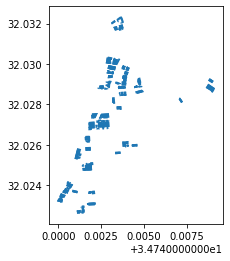

In [380]:
buildings_ts_filter.plot()

In [462]:
bldgs = gpd.read_file('https://raw.githubusercontent.com/Shai2u/demographic_estimation_dashboard_article/main/dashboard/data/buildings_for_dashboard_4326.geojson')

In [464]:
bldgs['start_date'] = pd.to_datetime(bldgs['start_date'])
bldgs['end_date'] = pd.to_datetime(bldgs['end_date'])
d = pd.to_datetime('2022-02-02')

<AxesSubplot:>

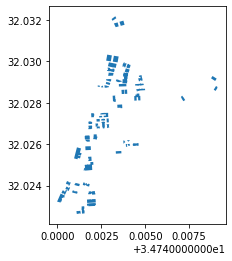

In [465]:
bldgs[(bldgs['start_date']< d ) & (bldgs['end_date']> d )].plot()

In [500]:
bldgs1 = bldgs[(bldgs['start_date']< d ) & (bldgs['end_date']> d )].copy().reset_index(drop=True)
bldg_status = bldgs1['status'].value_counts().to_frame().reset_index()
bldg_status.rename(columns={'index':'status','status':'count'},inplace=True)

In [501]:
bldg_status

,status,count
0,Building before,29
1,Building after,22
2,Construction,16


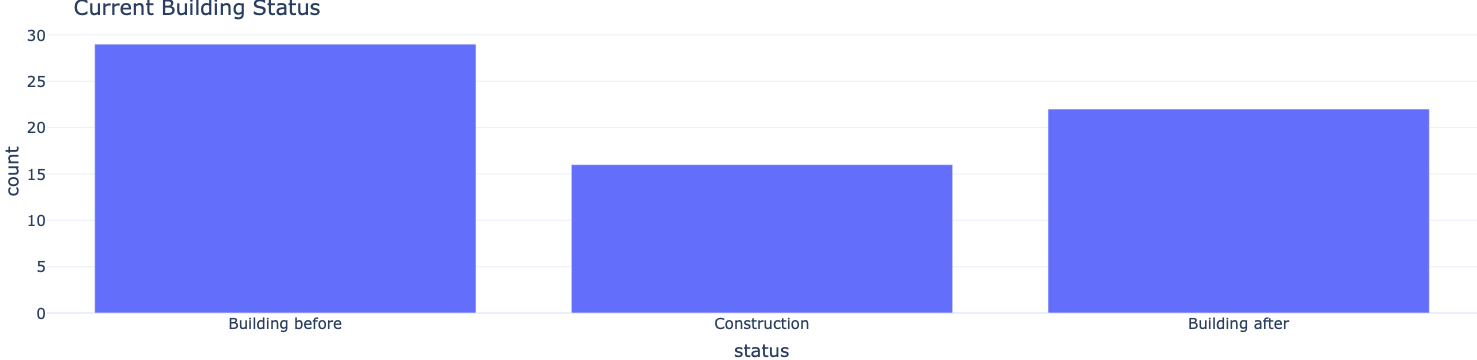

In [502]:
import plotly.express as px


fig = px.bar(bldg_status, x="status", y="count",width=450,height=300,template='plotly_white',title="Current Building Status",category_orders={'status':['Building before', 'Construction', 'Building after']})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0,"pad":0},
showlegend=True,

font=dict(
    size=15,
)
)
fig.update_yaxes(automargin=True)

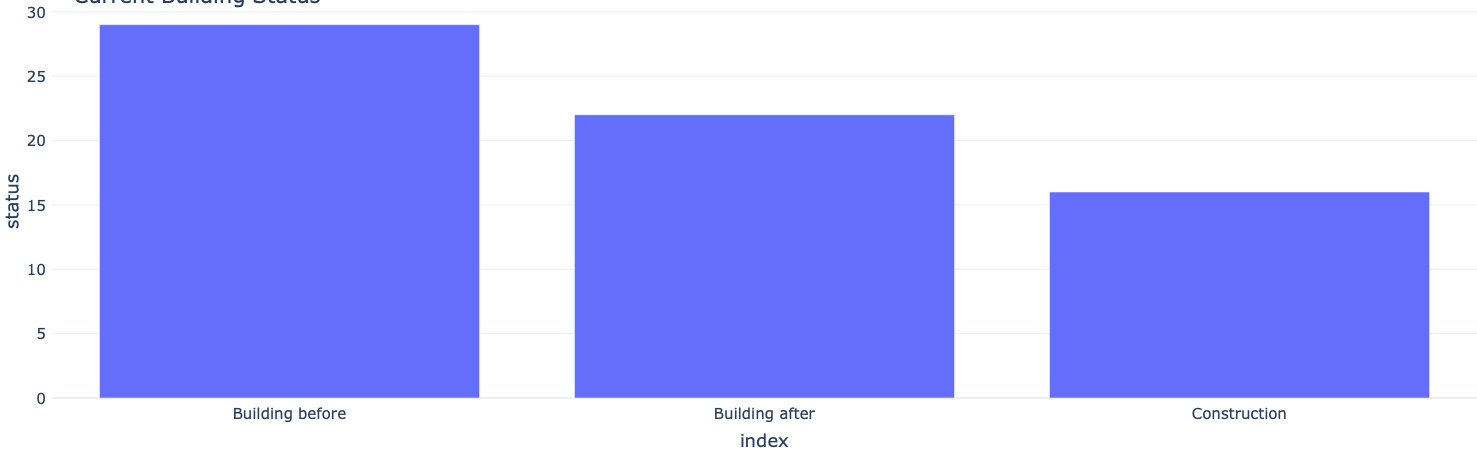

In [489]:
fig.show()

In [396]:
json.loads(bldgs1.to_json())

TypeError: Object of type Timestamp is not JSON serializable

In [395]:
import json

In [400]:
bldgs['status'].unique()

array(['Building before', 'Construction', 'Building after'], dtype=object)

In [403]:
classes = ['Building before', 'Construction', 'Building after']
colorscale = ['#FFEDA0', '#FEB24C', '#FC4E2A']
style = dict(weight=2, opacity=1, color='white', dashArray='3', fillOpacity=0.7)
# Create colorbar.

In [404]:
ctg

['Building before+', 'Construction+', 'Building after+']

In [ ]:
classes = [0, 10, 20, 50, 100, 200, 500, 1000]

In [405]:
bldgs = gpd.read_file('/Users/shai/Google Drive offline/Education/Article Publications/population demographic tracking/git/demographic_estimation_dashboard_article/dashboard/data/buildings_for_dashboard_4326.geojson')

In [408]:
bldgs.head()
# for each building
#sample construction start date
# place it in buidling end date


,fid,Area,floors,height,bld_num,bld_addres,hebrew_adr,project_nu,units,project_na,project_ty,status,East,North,East_wgs84,North_wgs8,active,start_date,end_date,GlobalID,deltaDays,Area_1,temp_heigh,randH,geometry
0,1.0,456.624954,3.0,13.0,94.0,215_22,"סוקולוב 22, בת ים",20140882,18.0,None,1.0,Building before,175757.206152,658982.882610,34.741942,32.023251,1.0,2000-01-01,2014-07-28,15067677-2690-4821-9de9-16bde042f745,5322.0,637.113372,None,5,"POLYGON ((34.74172 32.02321, 34.74172 32.02327..."
1,2.0,265.821715,3.0,13.0,17.0,216_4,"מסריק 4, בת ים",20141086,12.0,None,1.0,Building before,175680.060156,659070.929640,34.741121,32.024042,1.0,2000-01-01,2014-10-08,374f9596-2397-433c-96d6-82ec7f214154,5394.0,370.895857,None,4,"POLYGON ((34.74107 32.02401, 34.74107 32.02401..."
2,3.0,158.986180,3.0,13.0,214.0,209_6,"ארלוזורוב 6, בת ים",20140231,6.0,None,2.0,Building before,175950.936300,659680.635944,34.743961,32.029550,1.0,2000-01-01,2014-01-17,b662cfa9-66ce-4e9c-ba55-4474171e5ff6,5130.0,221.860645,None,5,"POLYGON ((34.74388 32.02952, 34.74391 32.02961..."
3,4.0,743.350688,4.0,16.0,213.0,209_8_209_10_209_12,"ארלוזורוב 8-12, בת ים",20120894,48.0,None,1.0,Building before,175941.019136,659640.557221,34.743858,32.029188,1.0,2000-01-01,2013-01-20,12a97223-90b2-47db-8dc4-a179b2a5ed33,4768.0,1037.304708,None,4,"POLYGON ((34.74373 32.02907, 34.74373 32.02907..."
4,5.0,391.764026,3.0,13.0,212.0,208_12,"הלפר 12, בת ים",20181295,24.0,None,1.0,Building before,175911.943505,659490.282833,34.743557,32.027832,1.0,2000-01-01,2018-10-01,e7b90ee0-7820-4929-b1b4-2849aef8fdae,6848.0,546.669831,None,6,"POLYGON ((34.74367 32.02791, 34.74368 32.02775..."


In [430]:
for bld_code in bldgs_lsit1:
    e_date = bldgs.loc[(bldgs['project_nu']==bld_code)&(bldgs['status']=='Construction'),'start_date'].reset_index().loc[0,'start_date']
    bldgs.loc[(bldgs['project_nu']==bld_code)&(bldgs['status']=='Building before'),'end_date'] = e_date

In [431]:
bldgs.to_file('/Users/shai/Google Drive offline/Education/Article Publications/population demographic tracking/git/demographic_estimation_dashboard_article/dashboard/data/buildings_for_dashboard_4326.geojson',driver='GeoJSON')

/usr/local/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [411]:
bldgs_lsit1 = list(buildings_ts['project_nu'].unique())

In [10]:
import numpy as np

In [1]:
import pandas as pd


In [2]:
Agets_ts_bld_status = pd.read_csv('agents_track_status.csv')

In [59]:
Agets_ts_bld_status['status'].replace({'leave':'Leave'},inplace=True)

In [35]:
income_dict = Agets_ts_bld_status.loc[Agets_ts_bld_status['status']=='stay'].groupby('ProjNumber').agg({'income':lambda p: int(np.mean(p))}).reset_index()

In [36]:
bld_income_dict = dict(zip(income_dict['ProjNumber'],income_dict['income']))

In [ ]:
income_dict = Agets_ts_bld_status.loc[

In [37]:
no_income = Agets_ts_bld_status['income'].isna()

In [38]:
no_income = no_income[no_income==True]

In [44]:
no_income.index

Int64Index([ 758,  759,  762,  767,  775,  776,  777,  778,  780,  783,
            ...
            5171, 5184, 5205, 5207, 5209, 5222, 5243, 5245, 5247, 5260],
           dtype='int64', length=516)

7997

In [48]:
Agets_ts_bld_status.loc[no_income.index,'income'] = Agets_ts_bld_status.loc[no_income.index,'ProjNumber'].apply(lambda p: np.random.randint(bld_income_dict.get('502-0196659')-2000,bld_income_dict.get('502-0196659')+2000))

In [42]:
pd.options.display.max_columns=100

In [61]:
Agets_ts_bld_status.to_csv('agents_track_status.csv')

In [51]:
Agets_ts_bld_status.drop(columns='Unnamed: 0',inplace=True)

In [58]:
Agets_ts_bld_status[Agets_ts_bld_status['income'].notna()]

,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice,bld_status
0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.000000,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.000000,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
2,210_19,3,210_19_3,20180988,70,16,38,0,0,1,15361.000000,0,1,2a6d052a-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
3,210_19,4,210_19_4,20180988,70,6,16,0,1,0,5428.000000,0,1,2a6d0566-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
4,210_19,5,210_19_5,20180988,70,17,61,0,0,1,12282.000000,1,0,2a6d058e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Building before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,201_75_rr,24,201_75_rr_24,502-0368860,112,0,50,0,0,1,25230.000000,0,1,3cb6769e-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9417.16,0.373252,NaN,8359,NaN,Building after
5744,201_75_rr,25,201_75_rr_25,502-0368860,112,0,27,0,0,1,24886.684211,0,1,3cb67748-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9369.16,0.376473,NaN,8311,NaN,Building after
5745,201_75_rr,26,201_75_rr_26,502-0368860,112,0,24,0,0,1,27497.210526,1,0,3cb6777a-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,8898.16,0.323602,NaN,0,NaN,Building after
5746,201_75_rr,27,201_75_rr_27,502-0368860,112,0,39,0,0,1,27374.684211,0,1,3cb677ac-9b83-11eb-88c0-acde48001122,3,32,New Comers,32.0,450.0,608.16,9369.16,0.342256,NaN,8311,NaN,Building after


In [60]:
Agets_ts_bld_status['status'].unique()

array(['stay', 'Leave', 'New Comers'], dtype=object)